In [1]:
# ! [ -e /content ] && pip install -Uqq fastbook


In [2]:
import fastbook
# fastbook.setup_book()

In [12]:
from fastbook import *
from duckduckgo_search import DDGS
from fastcore.all import *
from fastdownload import download_url
from fastai.vision.all import *
import PIL
import os

In [13]:

def search_images(term,max_images = 30):

  """term: object we are searching images for
      max_images : max no. of images we need"""

  print(f"Searching for '{term}'")
  return L(DDGS(term, max_results=max_images)).itemgot('image')



In [16]:
from duckduckgo_search import DDGS
from fastdownload import download_url
from PIL import Image

def search_images(term, max_images):
    print(f"Searching for '{term}'")
    ddgs = DDGS()  # Initialize the DDGS object
    results = ddgs.images(term, max_results=max_images)  # Perform the image search
    return results

# Fetching an image and showing it
urls = search_images('weapon', max_images=1)

if urls:
    dest = 'weapon22.jpg'
    download_url(urls[0]['image'], dest, show_progress=False)  # Access the image URL
    im = Image.open(dest)
    im.show()  # Show the image
else:
    print("No images found.")


Searching for 'weapon'


In [18]:
# Fetching for different search
results = search_images('human holding weapon', max_images=5)

if len(results) > 3:  # Check if there are at least 4 results
    download_url(results[3]['image'], 'human_weapon1.jpg', show_progress=False)
    im = Image.open('human_weapon1.jpg')
    im.show()  # Show the image
else:
    print("Not enough images found.")


Searching for 'human holding weapon'


In [19]:
searches = 'weapons','human holding weapon'
path = Path('holding_weapon_or_not')
from time import sleep

In [22]:
for o in searches:
    dest = (path / o)
    dest.mkdir(exist_ok=True, parents=True)

    # Extract URLs from the search results
    urls_photo = [result['image'] for result in search_images(f'{o} photo', max_images=5)]
    download_images(dest, urls=urls_photo)
    sleep(10)  # Pause between searches to avoid over-loading server

    urls_indoor = [result['image'] for result in search_images(f'{o} indoor photo', max_images=5)]
    download_images(dest, urls=urls_indoor)
    sleep(10)

    urls_outdoor = [result['image'] for result in search_images(f'{o} outdoor photo', max_images=5)]
    download_images(dest, urls=urls_outdoor)
    sleep(10)

    resize_images(path / o, max_size=400, dest=path / o)


Searching for 'weapons photo'
Searching for 'weapons indoor photo'
Searching for 'weapons outdoor photo'
Searching for 'human holding weapon photo'
Searching for 'human holding weapon indoor photo'
Searching for 'human holding weapon outdoor photo'


In [27]:
import os

folder = "holding_weapon_or_not"
path_ = "/Users/prajwalsingh/Desktop/Deep-Learning-Mini-Project-main"

def rename_images(folder, path):
    # Full path to the main folder
    main_folder_path = os.path.join(path, folder)

    for filename in os.listdir(main_folder_path):
        # Construct path to the specific folder for each image category
        category_folder_path = os.path.join(main_folder_path, filename)

        # Check if the category folder exists
        if not os.path.isdir(category_folder_path):
            print(f"Directory not found: {category_folder_path}")
            continue

        for count, image_name in enumerate(os.listdir(category_folder_path)):
            if str(filename) in str(image_name):
                print(f"'{image_name}' already renamed.")
                continue
            
            dst = f"{str(filename)}_{str(count)}.jpg"
            src = os.path.join(category_folder_path, image_name)  # Source path
            dst = os.path.join(category_folder_path, dst)  # Destination path

            try:
                os.rename(src, dst)  # Rename the file
                print(f"Renamed: '{src}' to '{dst}'")
            except Exception as e:
                print(f"Error renaming '{src}': {e}")

rename_images(folder, path_)


Directory not found: /Users/prajwalsingh/Desktop/Deep-Learning-Mini-Project-main/holding_weapon_or_not/.DS_Store
'weapons_79.jpg' already renamed.
'weapons_51.jpg' already renamed.
'weapons_45.jpg' already renamed.
'weapons_86.jpg' already renamed.
'weapons_87.jpg' already renamed.
'weapons_44.jpg' already renamed.
'weapons_50.jpg' already renamed.
'weapons_78.jpg' already renamed.
'weapons_52.jpg' already renamed.
'weapons_85.jpg' already renamed.
'weapons_84.jpg' already renamed.
'weapons_53.jpg' already renamed.
'weapons_47.jpg' already renamed.
'weapons_43.jpg' already renamed.
'weapons_57.jpg' already renamed.
'weapons_80.jpg' already renamed.
'weapons_81.jpg' already renamed.
'weapons_56.jpg' already renamed.
'weapons_42.jpg' already renamed.
'weapons_54.jpg' already renamed.
'weapons_40.jpg' already renamed.
'weapons_68.jpg' already renamed.
'weapons_83.jpg' already renamed.
'weapons_82.jpg' already renamed.
'weapons_69.jpg' already renamed.
'weapons_41.jpg' already renamed.
'we

holding_weapon_or_not


In [28]:
def is_holdingweapon(x):
    return parent_label(x)



Training Model

In [29]:
#Some photos might not download correctly which could cause our model training to fail, so we'll remove them:

failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

3

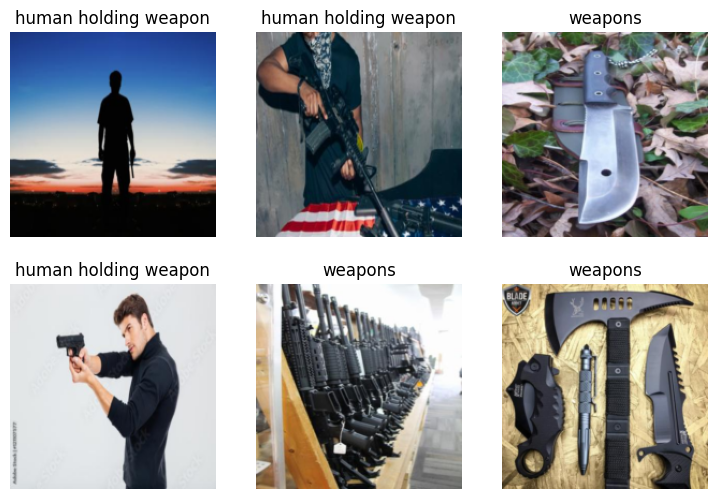

In [30]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=is_holdingweapon,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [31]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /Users/prajwalsingh/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:13<00:00, 3.57MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.196543,0.797655,0.200000,00:17


epoch,train_loss,valid_loss,error_rate,time
0,0.497191,0.627954,0.142857,00:05
1,0.296028,0.658169,0.114286,00:03
2,0.209390,0.639041,0.114286,00:03


In [32]:
learn.export('weapon_finder_model.pkl')

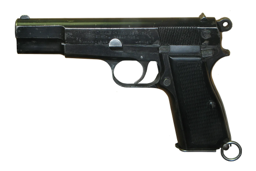

In [33]:
image = Image.open('weapon22.jpg')
# Create a PIL Image object from the opened image
pil_image = image.copy()
pil_image.to_thumb(256,256)

# Close the image file
# image.close()


In [34]:
is_holding_weapon,_,probs = learn.predict(pil_image)
print(f"This is a: {is_holding_weapon} image.")
print(f"Probability of human holding a weapon': {probs[0]:.4f}")

This is a: human holding weapon image.
Probability of human holding a weapon': 0.8967
